# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from os import path as osp
from tqdm.auto import tqdm

from functions import clean_text, plot_docs_matrix, plot_wordcloud

## Constantes e funções auxiliares

# Carga e prepação dos dados

In [2]:
file_amazon_raw = '../datasets/regulatron_legacy/raw/amazon.parquet.gzip'
file_amazon_clean = '../datasets/regulatron_legacy/clean/amazon_clean.parquet'
file_amazon_clean_targets = '../datasets/regulatron_legacy/clean/amazon_clean_targets.parquet'
file_map_category = '../datasets/regulatron_legacy/map_category.csv'

if osp.exists(file_amazon_clean_targets):
    df_amazon = pd.read_parquet(file_amazon_clean_targets)
else:
    df_amazon = pd.read_parquet(file_amazon_raw)
    df_amazon = df_amazon[~df_amazon['cat_0'].isna()]
    df_amazon = df_amazon.fillna('#NULO#')
    df_amazon = df_amazon.reset_index(drop=True)
    
    columns_to_keep = ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
    df_amazon['cat_full'] = df_amazon[columns_to_keep].apply(lambda row: '|'.join(row),axis=1)
    
    df_amazon['nome'] = df_amazon['Nome'].map(clean_text)
    df_amazon['descricao'] = df_amazon['Descrição_Principal'].map(clean_text)
    
    columns_to_keep = ['Link', 'nome', 'descricao', 'cat_full']
    df_amazon = df_amazon[columns_to_keep]
    
    df_cat = pd.read_csv(file_map_category,sep=';')
    df_amazon = df_amazon.merge(df_cat)

    df_amazon.to_parquet(file_amazon_clean_targets)

df_amazon

Link  \
0      https://www.amazon.com.br/Especiais-Cinematic-...   
1      https://www.amazon.com.br/Motores-Escova-Conju...   
2      https://www.amazon.com.br/Armazenamento-Protet...   
3      https://www.amazon.com.br/EQUSS-V-strom-Motoci...   
4      https://www.amazon.com.br/remote-control-brush...   
...                                                  ...   
51371  https://www.amazon.com.br/Fotografia-Quadcopte...   
51372  https://www.amazon.com.br/YITRE-Carregador-Eme...   
51373  https://www.amazon.com.br/reforço-Amplificador...   
51374  https://www.amazon.com.br/Hosioe-Altitude-Qudc...   
51375  https://www.amazon.com.br/Livros-Treinando-Ort...   

                                                    nome  \
0      filtro lente efeitos especiais blue streak cam...   
1      motores escova 4 conjuntos motores escova dron...   
2      bolsa armazenamento protetora drone capa rigid...   
3      equss ducati dl650 dl1000 v-strom dl 650 1000 ...   
4      remote control car brushless motor servo kit r...   
...                                                  ...   
51371  mini drone bolso hd folding fotografia aerea q...   
51372  yitre mini carregador portatil 2 1 carregador ...   
51373  kit reforco sinal kit reforco sinal amplificad...   
51374  hosioe ls-xt6 rc drone mini drone 6 eixos gyro...   
51375  kit 4 livros treinando ortografia nivel 1 2 3 ...   

                                               descricao  \
0      modelo aplicavel filtro listras azuis adequado...   
1      fonte alimentacao motor escova drone rc suport...   
2      valvula alivio pressao equipada valvula equili...   
3      super grip design criativo quatro suportes sao...   
4                                                          
...                                                  ...   
51371  experimente beleza mundo drone possui camera 6...   
51372                                                      
51373                                                      
51374  funcao cima baixo frente tras virar esquerda d...   
51375                                                      

                                                cat_full  \
0      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
1      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
2      Brinquedos e Jogos|Brinquedos de Controle Remo...   
3      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
4      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
...                                                  ...   
51371  Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
51372  Eletrônicos e Tecnologia|Celulares e Comunicaç...   
51373  Computadores e Informática|Dispositivos de Con...   
51374  Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...   
51375  Livros|Educação, Referência e Didáticos|#NULO#...   

                                target  
0                               Outros  
1                               Outros  
2                               Outros  
3                               Outros  
4                               Outros  
...                                ...  
51371                           Outros  
51372                     Carregadores  
51373  Dispositivos de Conexão em Rede  
51374                           Outros  
51375                           Outros  

[51376 rows x 5 columns]

In [3]:
df_targets = df_amazon[['target','Link']].groupby('target',as_index=False).count().sort_values(by='Link',ascending=False)
df_targets

target   Link
5                           Outros  29454
2          Celulares e Smartphones   6586
7                    Transceptores   5144
1                     Carregadores   3836
4  Dispositivos de Conexão em Rede   2613
0                            Cabos   2056
6   Teclados, Mouses e Periféricos   1080
3                           Câmera    607

# Visualização

Visualização das palavras mais frequentes no dataset

## Palavras mais frequentes no dataset inteiro

### Campo nome

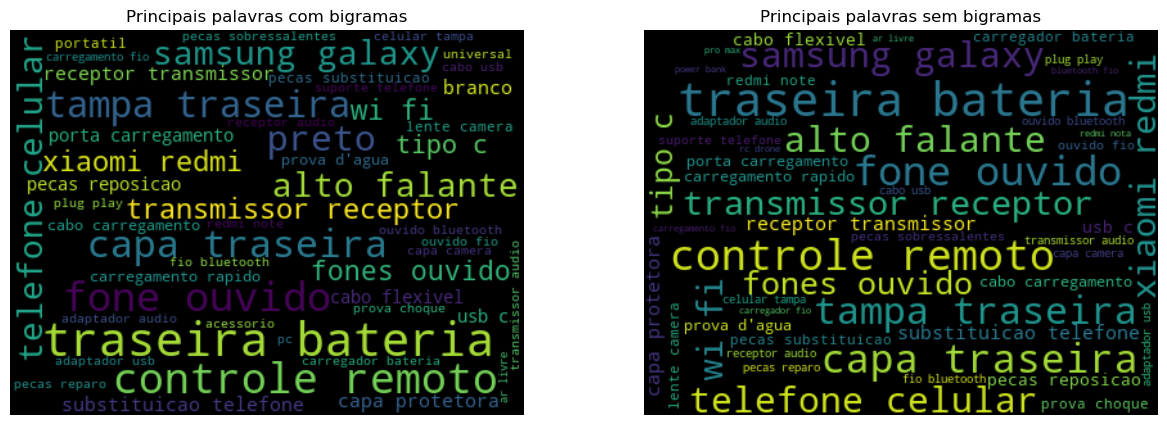

In [4]:
docs = df_amazon['nome'].to_list()
plot_wordcloud(docs)

### Campo descrição 

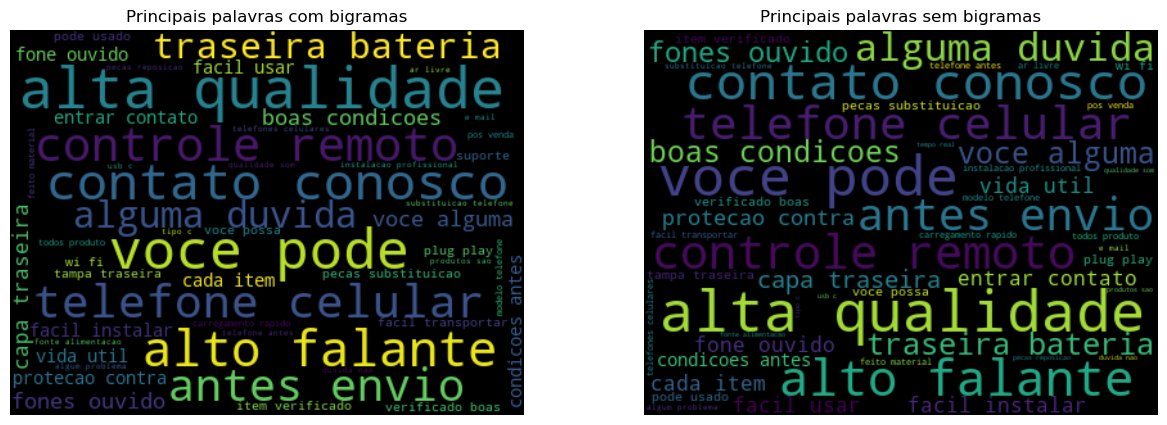

In [5]:
docs = df_amazon['descricao'].to_list()
plot_wordcloud(docs)

## Palavras mais frequentes no dataset segmentado por classe

### Campo nome

Categoria: Outros
Quantidade de items na categoria: 29454


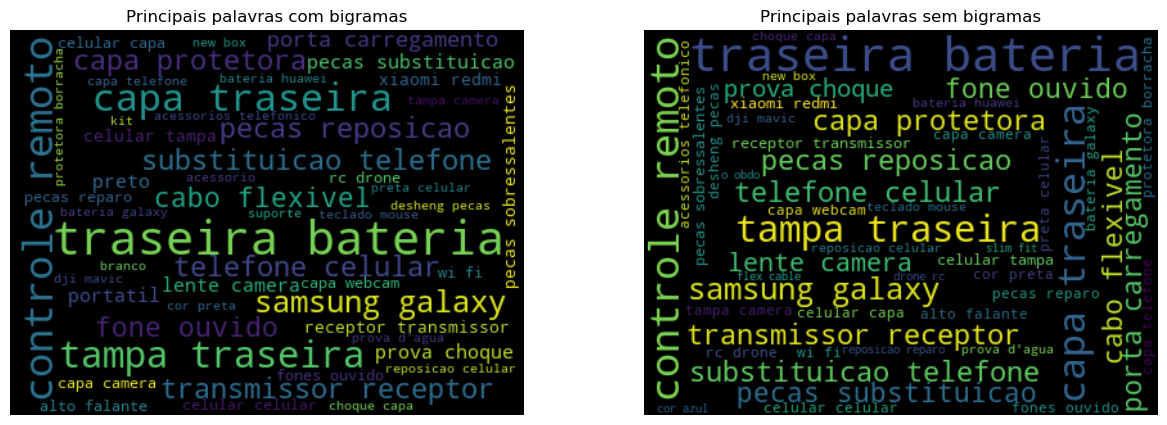

Categoria: Celulares e Smartphones
Quantidade de items na categoria: 6586


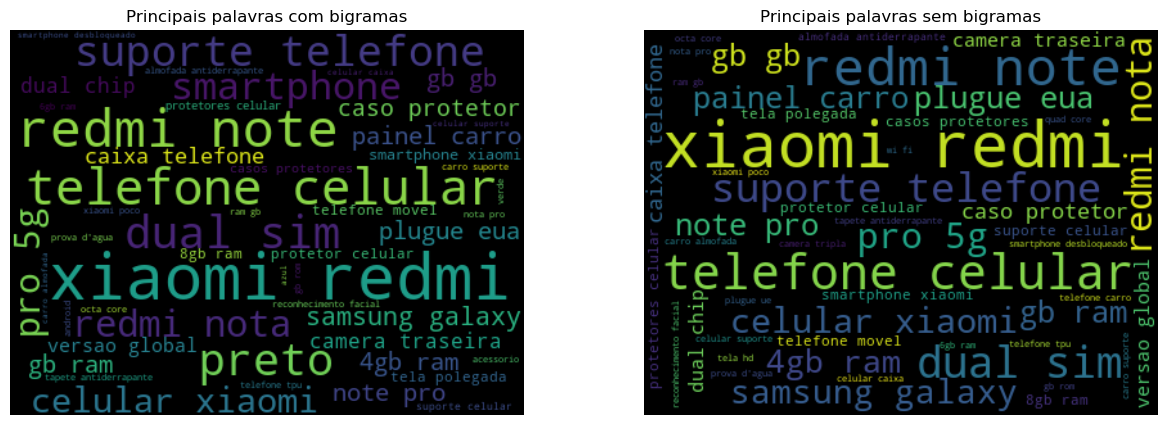

Categoria: Transceptores
Quantidade de items na categoria: 5144


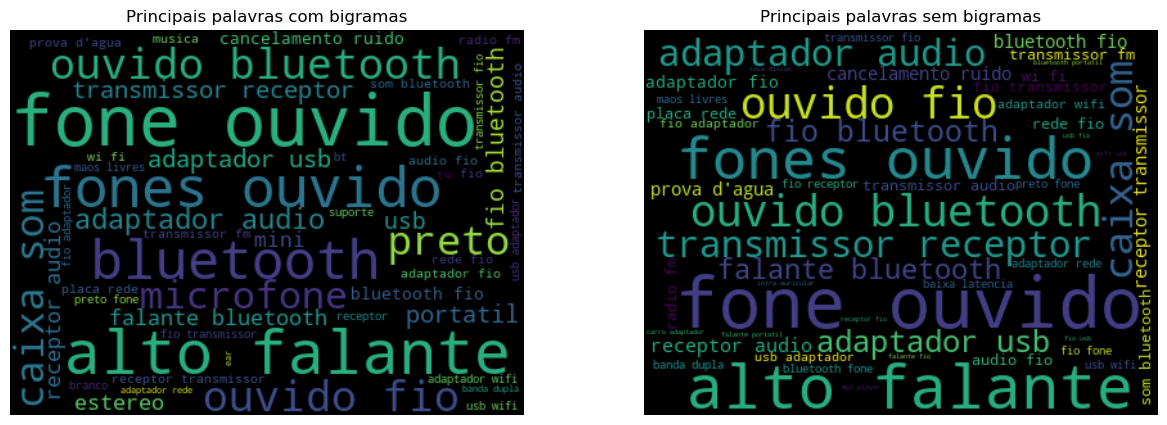

Categoria: Carregadores
Quantidade de items na categoria: 3836


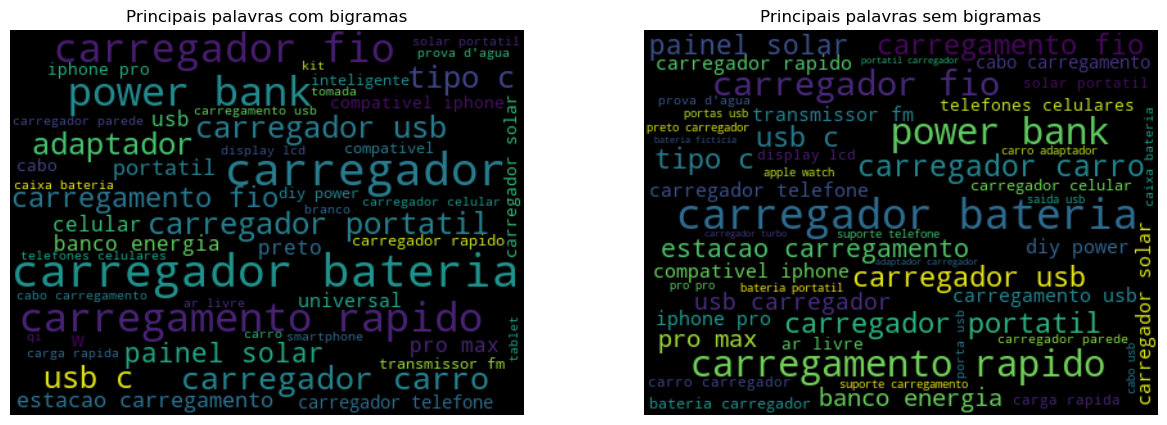

Categoria: Dispositivos de Conexão em Rede
Quantidade de items na categoria: 2613


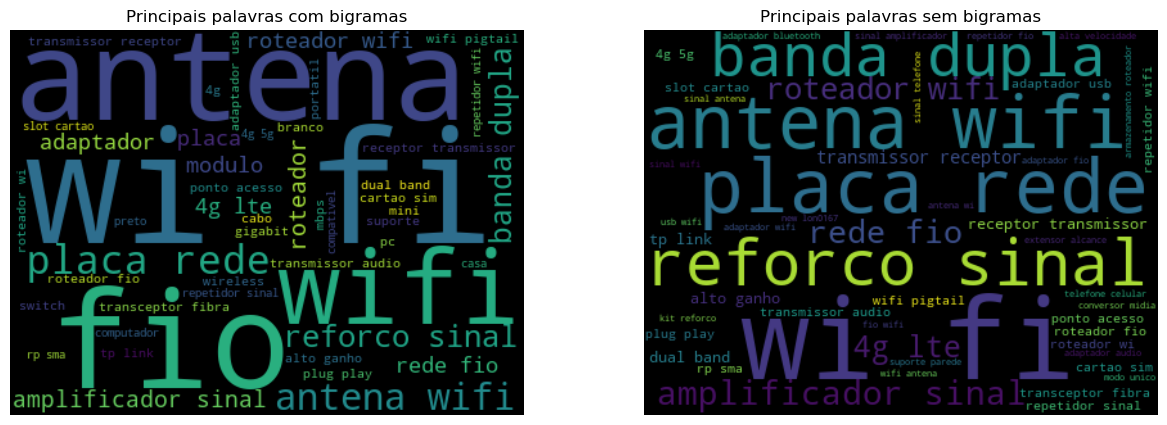

Categoria: Cabos
Quantidade de items na categoria: 2056


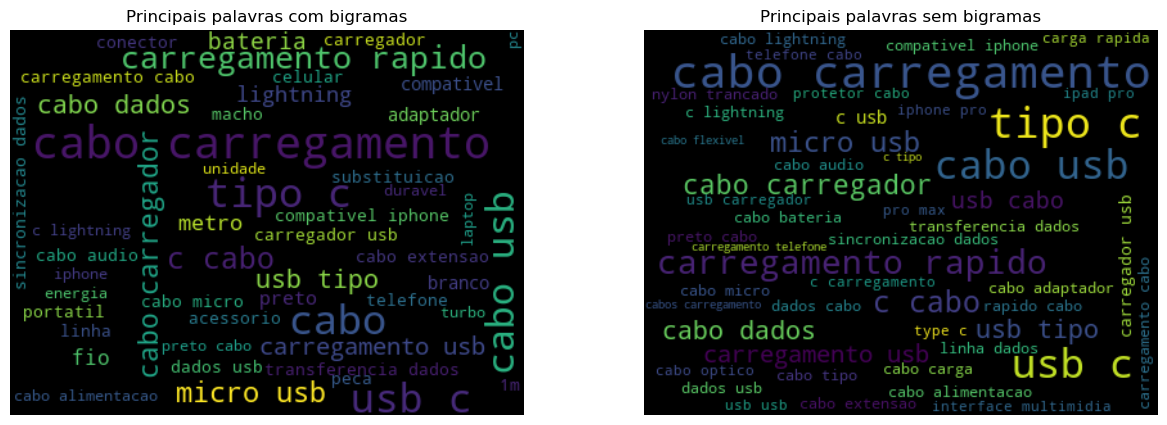

Categoria: Teclados, Mouses e Periféricos
Quantidade de items na categoria: 1080


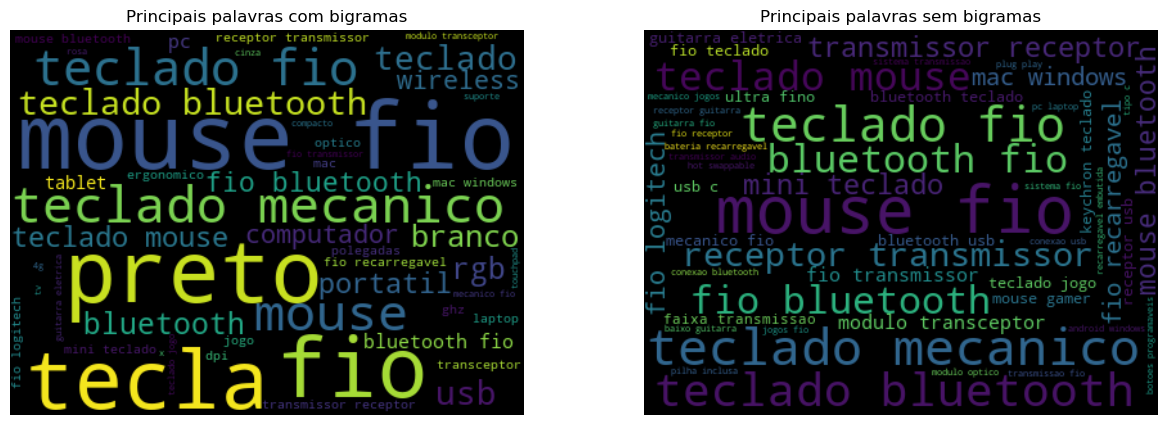

Categoria: Câmera
Quantidade de items na categoria: 607


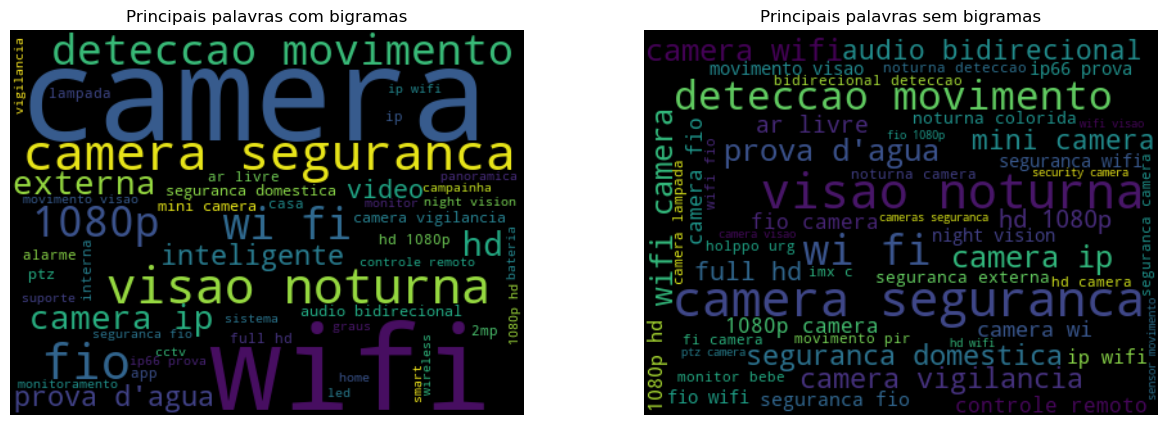

In [6]:
for target in df_targets['target'].unique():
    docs = df_amazon[df_amazon['target']==target]['nome'].to_list()
    items_count = df_targets[df_targets['target']==target]['Link'].values[0]
    print(f'Categoria: {target}\nQuantidade de items na categoria: {items_count}')
    plot_wordcloud(docs)

### Campo descrição

Categoria: Outros
Quantidade de items na categoria: 29454


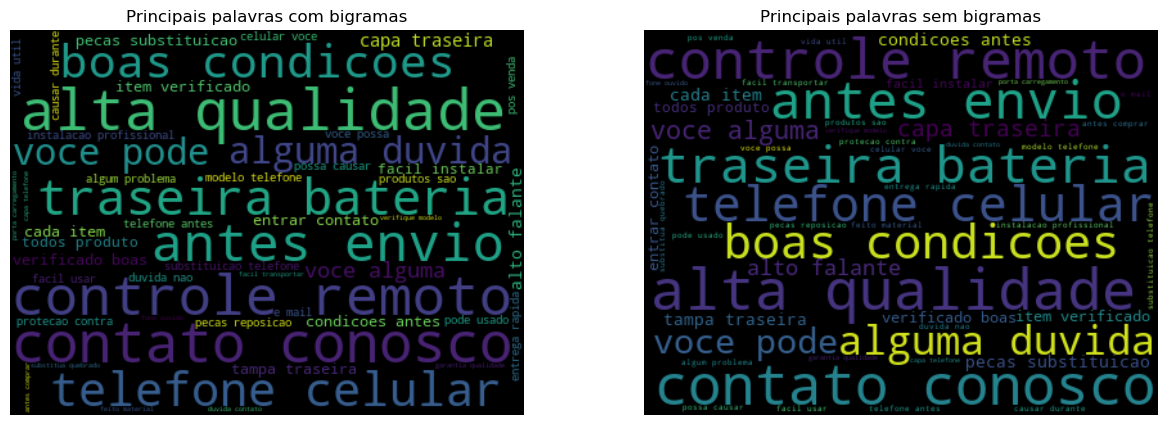

Categoria: Celulares e Smartphones
Quantidade de items na categoria: 6586


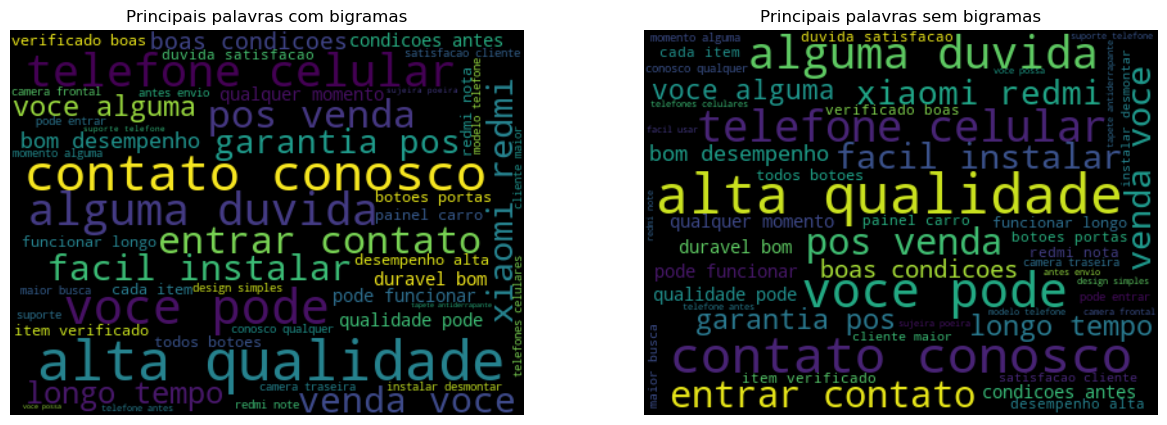

Categoria: Transceptores
Quantidade de items na categoria: 5144


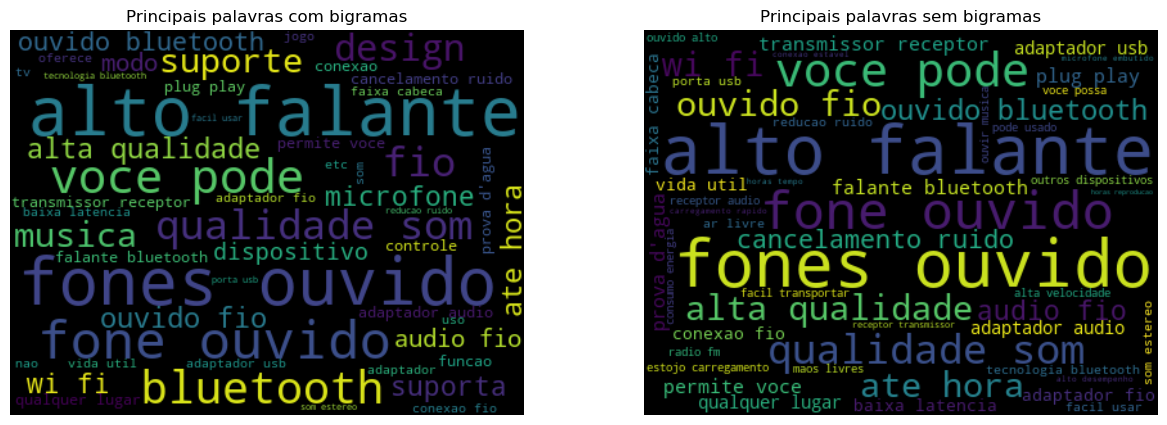

Categoria: Carregadores
Quantidade de items na categoria: 3836


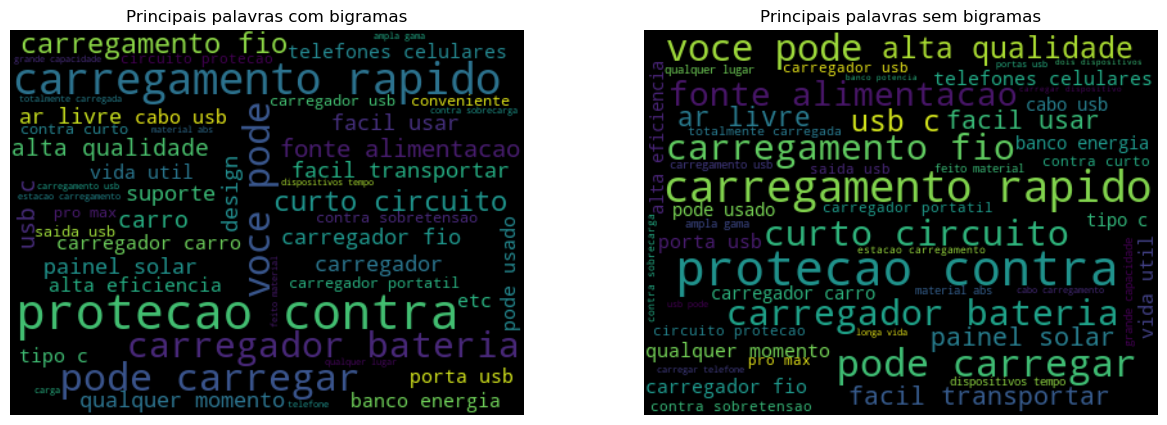

Categoria: Dispositivos de Conexão em Rede
Quantidade de items na categoria: 2613


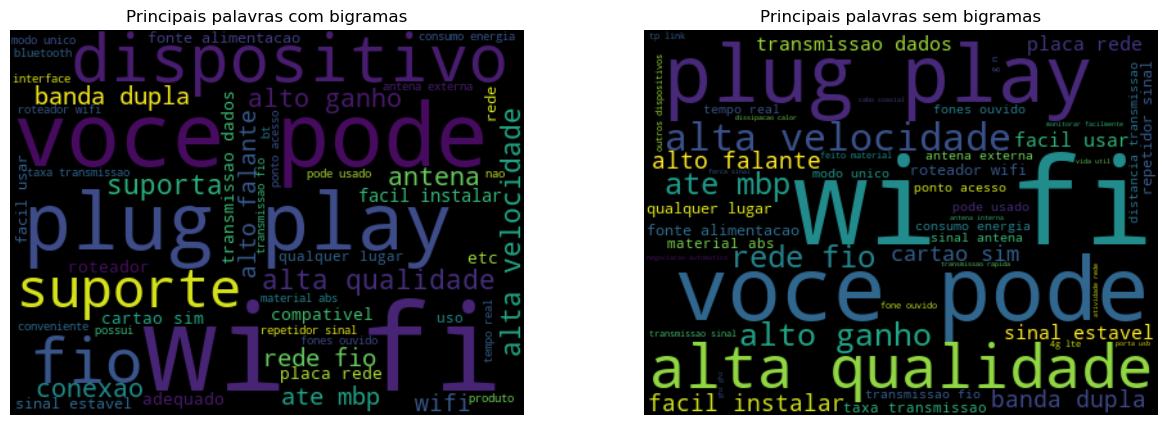

Categoria: Cabos
Quantidade de items na categoria: 2056


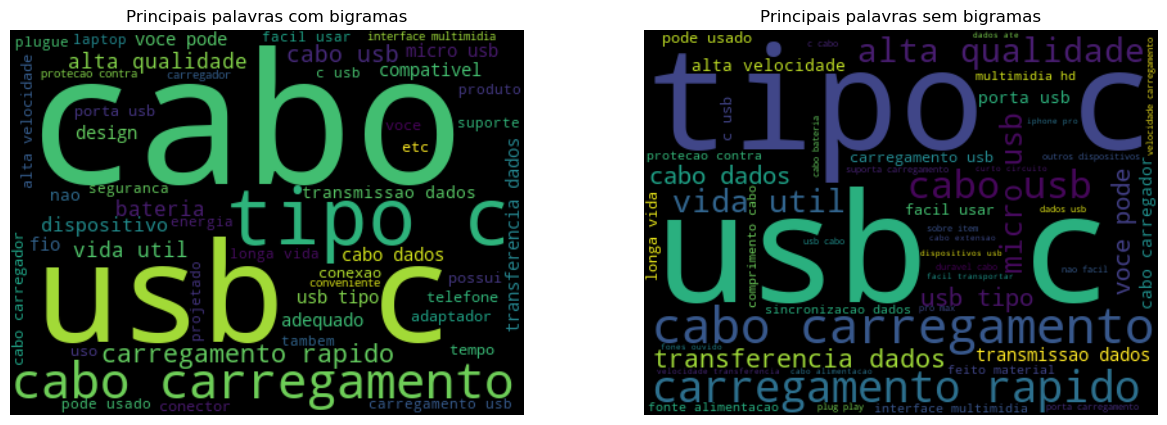

Categoria: Teclados, Mouses e Periféricos
Quantidade de items na categoria: 1080


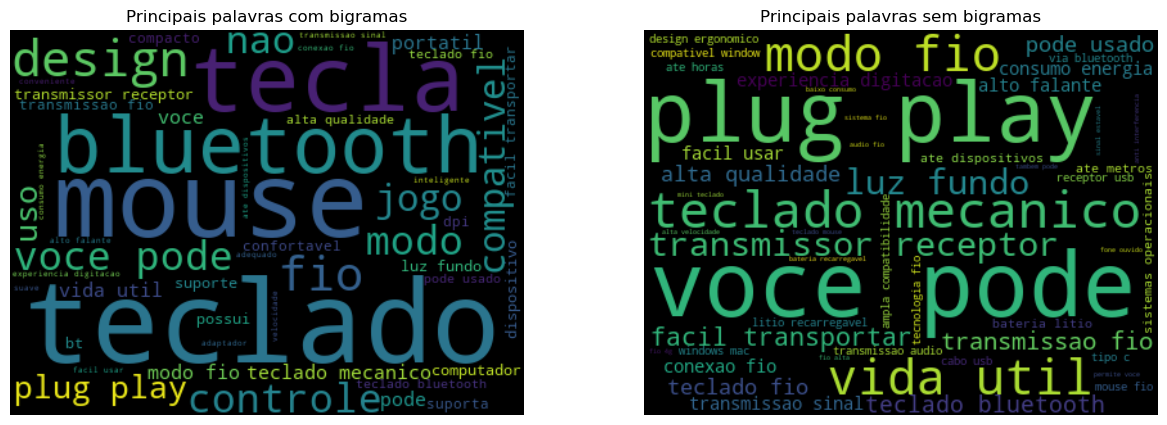

Categoria: Câmera
Quantidade de items na categoria: 607


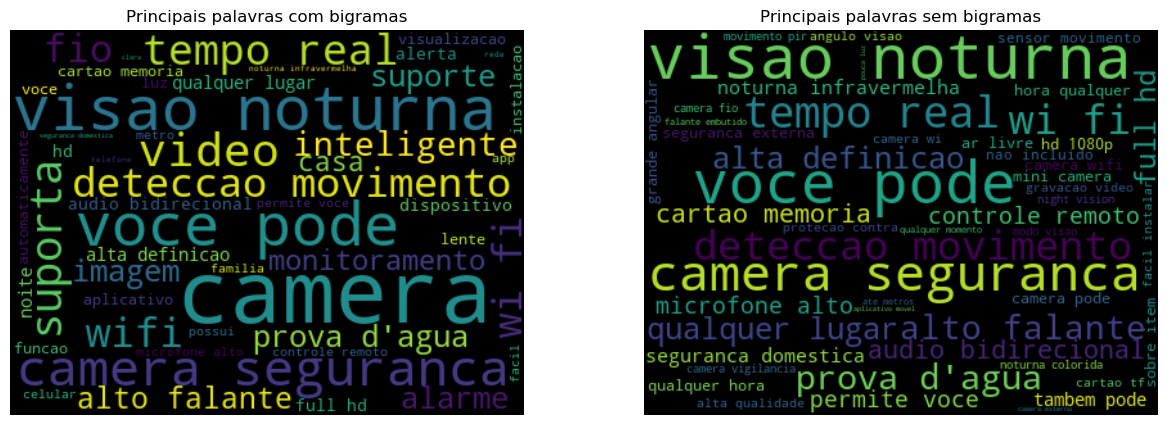

In [7]:
for target in df_targets['target'].unique():
    docs = df_amazon[df_amazon['target']==target]['descricao'].to_list()
    items_count = df_targets[df_targets['target']==target]['Link'].values[0]
    print(f'Categoria: {target}\nQuantidade de items na categoria: {items_count}')
    plot_wordcloud(docs)